# Procedural Python and Unit Tests

In this section, our main goal will be to outline how to go from the kind of trial-and-error exploratory data analysis [we explored this morning](./ExploratoryAnalysis), into a nice, linear, reproducible analysis.

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Step 1: Downloading the Data

We want a function that will download the data *automatically* if it does not already exist.

In [2]:
URL = "https://s3.amazonaws.com/pronto-data/open_data_year_one.zip"

In [3]:
import urllib.request
urllib.request.urlretrieve?

In [4]:
import os
os.path.exists('open_data_year_one.zip')

True

In [5]:
# Python 2:
# from urllib import urlretrieve
# Python 3:
from urllib.request import urlretrieve
import os


def download_if_needed(url, filename, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    else:
        pass

    
download_if_needed(URL, 'open_data_year_one.zip')

In [6]:
!ls

ProceduralPython.ipynb google-home.html       pronto_utils.py
__pycache__            open_data_year_one.zip


## Step 2: Make a Package

Now that this function works, let's create a Python package that we can import it from

*(Use a text editor to edit [pronto_utils.py](pronto_utils.py))*

In [7]:
from pronto_utils import download_if_needed
download_if_needed(URL, 'open_data_year_one.zip')

File open_data_year_one.zip already exists; not downloading


Use Python to unzip and load the data:

In [8]:
import zipfile
import pandas as pd

def load_trip_data(filename='open_data_year_one.zip'):
    """Load trip data from the zipfile; return as DataFrame"""
    download_if_needed(URL, filename)
    zf = zipfile.ZipFile(filename)
    return pd.read_csv(zf.open('2015_trip_data.csv'))

data = load_trip_data()
data.head()

File open_data_year_one.zip already exists; not downloading


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


*(paste the above function in [pronto_utils.py](pronto_utils.py))*

In [9]:
from pronto_utils import load_trip_data
data = load_trip_data()
data.head()

File open_data_year_one.zip already exists; not downloading


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Annual Member,Male,1971.0


## Step 3: Write a Unit Test

Let's write a unit test to make sure our download script works properly. We will use [pytest](http://doc.pytest.org/en/latest/) here.

In [10]:
import pandas as pd
from pronto_utils import load_trip_data

def test_trip_data():
    df = load_trip_data()
    assert isinstance(df, pd.DataFrame)
    assert df.shape == (142846, 12)
    
test_trip_data()

File open_data_year_one.zip already exists; not downloading


*(paste the above function in [pronto_utils.py](pronto_utils.py))*

In [11]:
!py.test pronto_utils.py

============================= test session starts ==============================
platform darwin -- Python 3.5.3, pytest-2.9.1, py-1.4.31, pluggy-0.3.1
rootdir: /Users/jakevdp/short-course/short-course/LectureNotes/ProceduralPython, inifile: 
collected 2 items 

pronto_utils.py ..

=========================== 2 passed in 1.64 seconds ===========================


## Breakout: Add functionality

Working in pairs, do the following:

1. create a function that will plot an interesting aspect of this data
2. once you are happy with the function, copy it into the Python package you have created
3. Write a "smoke-test" – this is a test that calls the function, but doesn't necessarily validate the output. This can be useful for "testing" plotting functions, because it's generally difficult to programatically evaluate the plot output itself

For step 3, you'll have to tell matplotlib not to invoke the graphical backend, which you can do by putting the following at the top of the test file:

```python
import matplotlib as mpl
mpl.use('Agg')  # Don't invoke graphical backend for plots
```

If you want to go farther with testing the output of your plot, matplotlib has some [useful plot testing tools](http://matplotlib.org/2.0.0/devel/testing.html#writing-an-image-comparison-test) that you can use.

In [12]:
%matplotlib inline

File open_data_year_one.zip already exists; not downloading


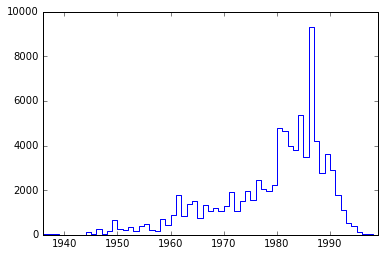

In [13]:
def plot_totals_by_birthyear():
    df = load_trip_data()
    totals_by_birthyear = df.birthyear.value_counts().sort_index()
    return totals_by_birthyear.plot(linestyle='steps')

plot_totals_by_birthyear()

In [14]:
def test_plot_totals():
    ax = plot_totals_by_birthyear()
    assert len(ax.lines) == 1
    

In [15]:
import numpy as np
import matplotlib as mpl

def test_plot_totals_by_birthyear():
    ax = plot_totals_by_birthyear()
    
    # Some tests of the output that dig into the
    # matplotlib internals
    assert len(ax.lines) == 1
    
    line = ax.lines[0]
    x, y = line.get_data()
    assert np.all((x > 1935) & (x < 2000))
    assert y.mean() == 1456

File open_data_year_one.zip already exists; not downloading


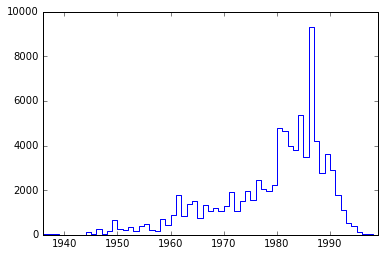

In [16]:
test_plot_totals_by_birthyear()

In [17]:
!py.test pronto_utils.py

============================= test session starts ==============================
platform darwin -- Python 3.5.3, pytest-2.9.1, py-1.4.31, pluggy-0.3.1
rootdir: /Users/jakevdp/short-course/short-course/LectureNotes/ProceduralPython, inifile: 
collected 2 items 

pronto_utils.py ..

=========================== 2 passed in 1.78 seconds ===========================
